# Random Forests 

#### Welcome to the jungle of car auctions reality :)

#### Import Modules

In [4]:
# Import Modules and functions
# ----------------------------
from Functions import *
from Modules   import *

#### Read DataFrame

In [5]:
df    = pd.read_csv('..\\Data\\data_train.csv')
X_aim = pd.read_csv('..\\Data\\features_aim.csv')
# --- Clean and prepare data and Aim -----

X_train, X_test, y_train, y_test, X_aim = CLEAN_All_DATA(df, X_aim)

#### Simple RF model

In [40]:
# Preprocessor: Apply transformations to numerical and categorical columns
preprocessor  = ColumnTransformer([('num', 'passthrough', num_cols),
                                   ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)])

# Classifier: Random Forest with specified hyperparameters
rfc           = RandomForestClassifier(class_weight      = 'balanced', 
                                       random_state      = 42, 
                                       n_estimators      = 100, 
                                       max_depth         = 27,
                                       min_samples_split = 7,
                                       min_samples_leaf  = 3)

# Model Pipeline: Combine preprocessor and classifier in a pipeline
model_rfc  = Pipeline([('preprocessor', preprocessor),
                       ('rfClassifier', rfc)
                     ])


#### Fitting & scores

In [41]:
model_rfc.fit(X_train, y_train)                                  Train the RandomForest model on the training data

pred_rfc        = model_rfc.predict(X_test)
f1_rfc          = f1_score(y_test       , pred_rfc)
recall_rfc      = recall_score(y_test   , pred_rfc)
precision_rfc   = precision_score(y_test, pred_rfc)
accuracy_rfc    = accuracy_score(y_test , pred_rfc)

# Create a DataFrame to store metrics for the RandomForest model
grid_DT_metrics = pd.DataFrame({
                                'Model'    : ['Model RF'],
                                'F1 Score' : [f1_rfc],
                                'Recall'   : [recall_rfc],
                                'Precision': [precision_rfc],
                                'Accuracy' : [accuracy_rfc]
                              })

#### Confusion matrix

Scoring of RF


Model,F1 Score,Recall,Precision,Accuracy
Model RF,0.409820,0.483452,0.355652,0.820482


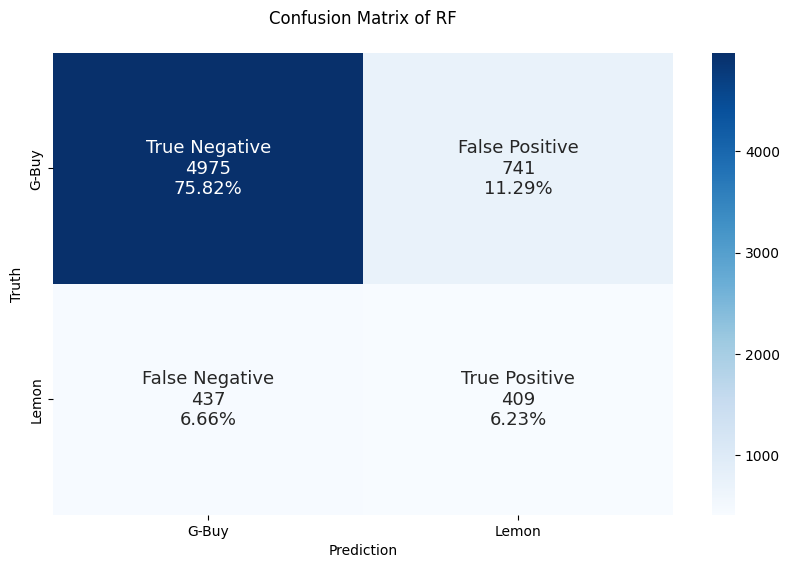

In [42]:
print('Scoring of RF')
display(grid_DT_metrics.style.hide())
Confusion_Matrix_Func(y_test, pred_rfc, 'RF');

#### RF GridSearch Without PCA and or Polynomial 

In [43]:

# RF GridSearch Without PCA and or Polynomial 

# num_pipeline = Pipeline([('poly'  , PolynomialFeatures(degree=2)),
#                          ('scaler', StandardScaler()),
#                          ('pca'   , PCA(n_components=.991))
#                         ])

preprocessor     = ColumnTransformer([
                                      ('num', 'passthrough', num_cols),                           # Preserve numerical columns
                                      ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)   # One-hot encode categorical columns with handling unknown values
                                    ])

rfc              = RandomForestClassifier(class_weight         = 'balanced',
                                          random_state         = 442,                             # Set a fixed random state for reproducibility
                                         )

pipeline_rfc     = Pipeline([('preprocessor', preprocessor),
                             ('rfClassifier', rfc)
                            ])

param_grid       = {
                   'rfClassifier__n_estimators'     : [87, 88, 89],  
                   'rfClassifier__max_depth'        : [35, 36, 37],  
                   'rfClassifier__min_samples_leaf' : [2 , 3 , 4 ],     
                   'rfClassifier__min_samples_split': [9 , 10, 11],     
                   }
model_rfc_grid   = GridSearchCV(estimator    = pipeline_rfc, 
                                param_grid   = param_grid, 
                                scoring      = 'f1', 
                                cv           = 3,  
                                n_jobs       = -1
                                )

#### Fit the model

In [44]:
model_rfc_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['MMRAcquisitionAuctionAveragePrice',
                                                                          'MMRAcquisitionAuctionCleanPrice',
                                                                          'MMRAcquisitionRetailAveragePrice',
                                                                          'MMRAcquisitonRetailCleanPrice',
                                                                          'MMRCurrentAuctionAveragePrice',
                                                                          'MMRCurrentAuctionCleanPrice',
                                                                          'MMRCurrentRetailAveragePrice',
                                                                          'MMRCu...
                                                                          'VNST',
                                                                          'PurchDate_year',
                                                                          'PurchDate_month',
                                                                          'PurchDate_dayofweek'])])),
                                       ('rfClassifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=442))]),
             n_jobs=8,
             param_grid={'rfClassifier__max_depth': [35, 36, 37],
                         'rfClassifier__min_samples_leaf': [2, 3, 4],
                         'rfClassifier__min_samples_split': [9, 10, 11],
                         'rfClassifier__n_estimators': [87, 88, 89]},
             scoring='f1')

#### Scores

In [45]:

optimised_rfc_grid   = model_rfc_grid.best_estimator_
optimised_rfc_params = model_rfc_grid.best_params_
pred_rfc_grid        = model_rfc_grid.predict(X_test) 

f1_rfc_grid            = f1_score(y_test       , pred_rfc_grid)
recall_rfc_grid        = recall_score(y_test   , pred_rfc_grid)
precision_rfc_grid     = precision_score(y_test, pred_rfc_grid)
accuracy_rfc_grid      = accuracy_score(y_test , pred_rfc_grid)


grid_rfc_metrics    = pd.DataFrame({
                                    'Model'    : ['GridSearch Optimised RFC'],
                                    'F1 Score' : [f1_rfc_grid],
                                    'Recall'   : [recall_rfc_grid],
                                    'Precision': [precision_rfc_grid],
                                    'Accuracy' : [accuracy_rfc_grid]
                                    })

#### The optimised model and its hyperparameters 

In [46]:
print('Scoring of GridSearch Optimised RF Classifier')
print('Optimised RFC Model:'    , optimised_rfc_grid)
print('Optimised RFC Parameters:', optimised_rfc_params)

Scoring of GridSearch Optimised RF Classifier
Optimised RFC Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['MMRAcquisitionAuctionAveragePrice',
                                                   'MMRAcquisitionAuctionCleanPrice',
                                                   'MMRAcquisitionRetailAveragePrice',
                                                   'MMRAcquisitonRetailCleanPrice',
                                                   'MMRCurrentAuctionAveragePrice',
                                                   'MMRCurrentAuctionCleanPrice',
                                                   'MMRCurrentRetailAveragePrice',
                                                   'MMRCurrentRetailCleanPrice',
                                                   'VehB...
                                                   'SubModel', 'Color',
                     

#### Scores and confusion matrix

Scoring of GridSearch RF


Model,F1 Score,Recall,Precision,Accuracy
GridSearch Optimised RFC,0.420455,0.393617,0.451220,0.860104


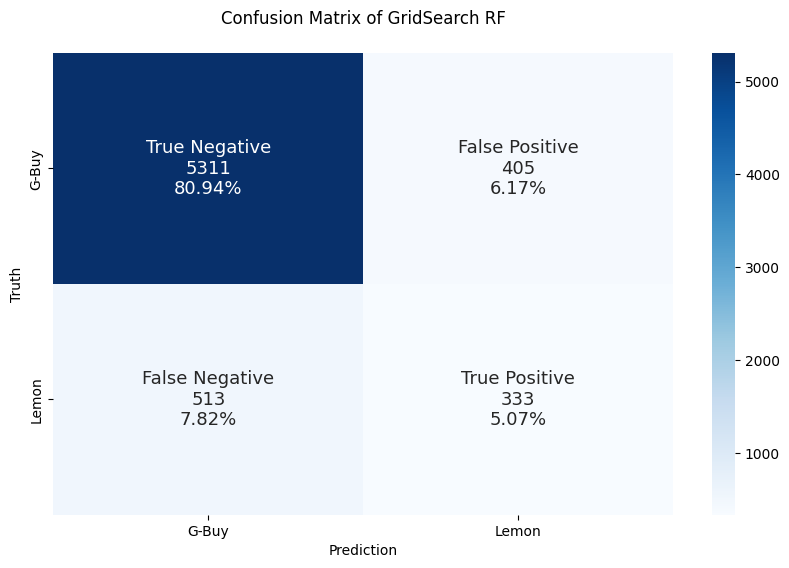

In [47]:
print('Scoring of GridSearch RF')
display(grid_rfc_metrics.style.hide())
Confusion_Matrix_Func(y_test, pred_rfc_grid, 'GridSearch RF');

#### Save the optimised RF model as pickle

In [48]:
directory_path = r"D:\Visual Studio Code\Used Cars Sales\Pickle"
filename       = "Optimised_GridSearch_RFC_noPCA_noPOLY.p"

# Save to the specified directory
pickle.dump(optimised_rfc_grid, open(directory_path + "\\" + filename, "wb"))

### Feature Engineering

#### RF GridSearch With PCA/Polynomial 

In [49]:

# RF GridSearch Without PCA and or Polynomial 

poly_pca_pipe             = Pipeline([('poly'  , PolynomialFeatures(degree=2)),
                                      ('scaler', StandardScaler()),
                                      ('pca'   , PCA(n_components=.991))
                                    ])

preprocessor              = ColumnTransformer([
                                              ('num', poly_pca_pipe, num_cols),
                                              ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
                                              ])

rfc                       = RandomForestClassifier(class_weight         = 'balanced',
                                                   random_state         = 442, 
                                                 )

pipeline_rfc_poly_pca     = Pipeline([('preprocessor', preprocessor),
                                      ('rfClassifier', rfc)
                                    ])

param_grid                = {
                            'rfClassifier__n_estimators'     : [87, 88, 89],  
                            'rfClassifier__max_depth'        : [35, 36, 37],  
                            'rfClassifier__min_samples_leaf' : [2 , 3 , 4 ],     
                            'rfClassifier__min_samples_split': [9 , 10, 11],     
                            }
model_rfc_poly_pca_grid   = GridSearchCV(estimator    = pipeline_rfc_poly_pca, 
                                         param_grid   = param_grid, 
                                         scoring      = 'f1', 
                                         cv           = 3,  
                                         n_jobs       = -1
                                         )

#### Fit it

In [50]:
model_rfc_poly_pca_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('poly',
                                                                                          PolynomialFeatures()),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.991))]),
                                                                         ['MMRAcquisitionAuctionAveragePrice',
                                                                          'MMRAcquisitionAuctionCleanPrice',
                                                                          'MMRAcquisitionRetailAveragePrice',
                                                                          'MMRAcquisitonRetailCleanPrice',
                                                                          'MMRC...
                                                                          'VNST',
                                                                          'PurchDate_year',
                                                                          'PurchDate_month',
                                                                          'PurchDate_dayofweek'])])),
                                       ('rfClassifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=442))]),
             n_jobs=-1,
             param_grid={'rfClassifier__max_depth': [35, 36, 37],
                         'rfClassifier__min_samples_leaf': [2, 3, 4],
                         'rfClassifier__min_samples_split': [9, 10, 11],
                         'rfClassifier__n_estimators': [87, 88, 89]},
             scoring='f1')

#### Scores

In [51]:
optimised_rfc_poly_pca_grid   = model_rfc_poly_pca_grid.best_estimator_
optimised_rfc_poly_pca_params = model_rfc_poly_pca_grid.best_params_
pred_rfc_poly_pca_grid        = model_rfc_poly_pca_grid.predict(X_test) 

f1_rfc_poly_pca_grid            = f1_score(y_test       , pred_rfc_poly_pca_grid)
recall_rfc_poly_pca_grid        = recall_score(y_test   , pred_rfc_poly_pca_grid)
precision_rfc_poly_pca_grid     = precision_score(y_test, pred_rfc_poly_pca_grid)
accuracy_rfc_poly_pca_grid      = accuracy_score(y_test , pred_rfc_poly_pca_grid)


grid_rfc_poly_pca_metrics      = pd.DataFrame({
                                            'Model'    : ['GridSearch Optimised RFC with POLY/PCA'],
                                            'F1 Score' : [f1_rfc_poly_pca_grid],
                                            'Recall'   : [recall_rfc_poly_pca_grid],
                                            'Precision': [precision_rfc_poly_pca_grid],
                                            'Accuracy' : [accuracy_rfc_poly_pca_grid]
                                            })

#### Another optimised model

In [52]:
print('Scoring of GridSearch Optimised RF Classifier')
print('Optimised RFC POLY/PCA Model:'     , optimised_rfc_poly_pca_grid)
print("Optimised RFC POLY/PCA Parameters:", optimised_rfc_poly_pca_params)

Scoring of GridSearch Optimised RF Classifier
Optimised RFC POLY/PCA Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.991))]),
                                                  ['MMRAcquisitionAuctionAveragePrice',
                                                   'MMRAcquisitionAuctionCleanPrice',
                                                   'MMRAcquisitionRetailAveragePrice',
                                                   'MMRAcquisitonRetailClean

#### Scores and confusion matrix yet again

Scoring of GridSearch RF


Model,F1 Score,Recall,Precision,Accuracy
GridSearch Optimised RFC with POLY/PCA,0.424574,0.412530,0.437343,0.855837


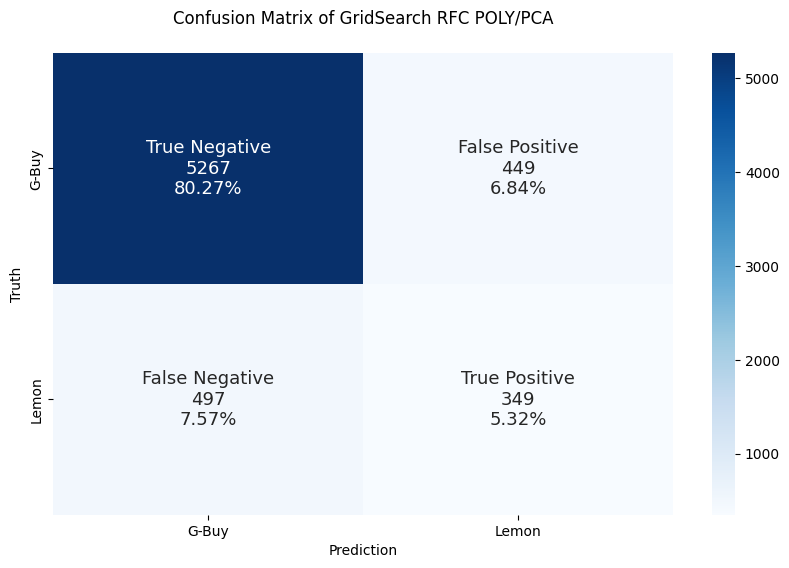

In [53]:
print('Scoring of GridSearch RF')
display(grid_rfc_poly_pca_metrics.style.hide())
Confusion_Matrix_Func(y_test, pred_rfc_poly_pca_grid, 'GridSearch RFC POLY/PCA');

#### Save the model

In [54]:
directory_path = r"D:\Visual Studio Code\Used Cars Sales\Pickle"
filename       = "Optimised_GridSearch_RFC_PCA_POLY.p"

# Save to the specified directory
pickle.dump(optimised_rfc_poly_pca_grid, open(directory_path + "\\" + filename, "wb"))

----------------------------

## Adding (K-means) generated Clusters as a new Feature to the dataframe

In [6]:
# This functions is defines in Functions.py
X_train_copy, X_test_copy, X_aim_copy, cat_cols_FE = Kmeans_FE(X_train, X_test, X_aim, cat_cols)

In [56]:
print(f'The shape of df      is : {df.shape}')                                  # Shape of you :)
print(f'The shape of X_train is : {X_train_copy.shape}')
print(f'The shape of X_test  is : {X_test_copy.shape}')
print(f'The shape of X_test  is : {X_aim_copy.shape}')
print(f'The shape of y_train is : {y_train.shape}')
print(f'The shape of y_test  is : {y_test.shape}')

The shape of df      is : (65620, 32)
The shape of X_train is : (59058, 34)
The shape of X_test  is : (6562, 34)
The shape of X_test  is : (7292, 34)
The shape of y_train is : (59058,)
The shape of y_test  is : (6562,)


#### RF Model with the new feature

In [57]:
num_pipeline     = Pipeline([('poly'  , PolynomialFeatures(degree=2)),
                             ('scaler', StandardScaler()),
                             ('pca'   , PCA(n_components=.99))
                            ])

preprocessor     = ColumnTransformer([
                                      ('num', num_pipeline, num_cols),
                                      ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_FE)
                                     ])

rfc              = RandomForestClassifier(class_weight      = 'balanced',
                                          random_state      = 442,  
                                          n_estimators      = 88, 
                                          max_depth         = 36,
                                          min_samples_leaf  = 2,    # 3 better recall
                                          min_samples_split = 10
                                          )

pipeline_rfc_poly_pca_EF = Pipeline([('preprocessor', preprocessor),
                                     ('rfClassifier', rfc)
                                     ])



#### Model fitting

In [58]:
pipeline_rfc_poly_pca_EF.fit(X_train_copy, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.99))]),
                                                  ['MMRAcquisitionAuctionAveragePrice',
                                                   'MMRAcquisitionAuctionCleanPrice',
                                                   'MMRAcquisitionRetailAveragePrice',
                                                   'MMRAcquisitonRetailCleanPrice',
                                                   'MMRCurrentAuctionAveragePrice',
                                                   'M...
                                                   'Transmission',
                                                   'Nationality', 'Size',
                                                   'TopThreeAmericanName',
                                                   'IsOnlineSale', 'PRIMEUNIT',
                                                   'AUCGUART', 'BYRNO',
                                                   'VNZIP1', 'VNST',
                                                   'PurchDate_year',
                                                   'PurchDate_month',
                                                   'PurchDate_dayofweek',
                                                   'TransactionCluster'])])),
                ('rfClassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=36,
                                        min_samples_leaf=2,
                                        min_samples_split=10, n_estimators=88,
                                        random_state=442))])

#### Scores

In [59]:

pred_rfc_FE         = pipeline_rfc_poly_pca_EF.predict(X_test_copy)
f1_rfc_FE           = f1_score(y_test, pred_rfc_FE)
recall_rfc_FE       = recall_score(y_test, pred_rfc_FE)
precision_rfc_FE    = precision_score(y_test, pred_rfc_FE)
accuracy_rfc_FE     = accuracy_score(y_test, pred_rfc_FE)

grid_DT_metrics = pd.DataFrame({
                                'Model'    : ['Model RF FE'],
                                'F1 Score' : [f1_rfc_FE],
                                'Recall'   : [recall_rfc_FE],
                                'Precision': [precision_rfc_FE],
                                'Accuracy' : [accuracy_rfc_FE]
                              })

#### Results

Scoring of RF FE Classifier


Model,F1 Score,Recall,Precision,Accuracy
Model RF FE,0.420469,0.403073,0.439433,0.856751


-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


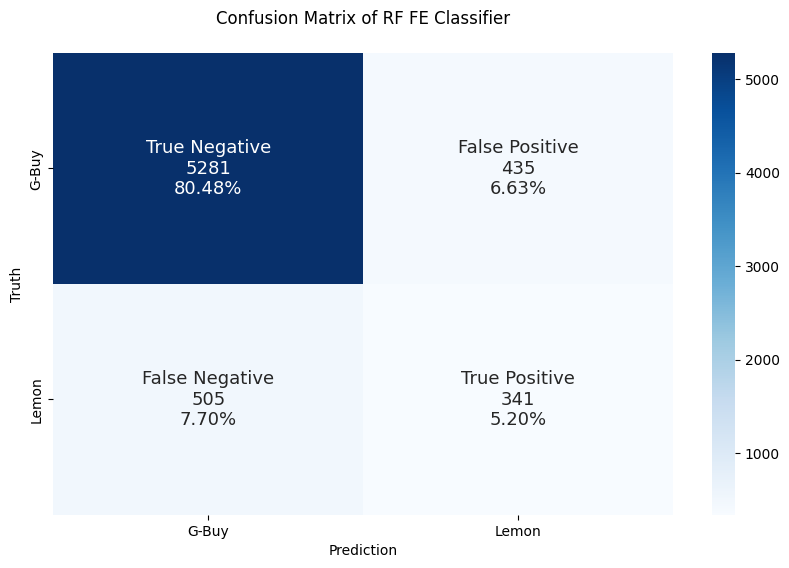

In [60]:
print('Scoring of RF FE Classifier')
# -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
display(grid_DT_metrics.style.hide())
print('-- '*30)
Confusion_Matrix_Func(y_test, pred_rfc_FE, 'RF FE Classifier');

### GridSearch for the RFC with FE cluster and Poly/PCA

In [80]:

# RF GridSearch Without PCA and or Polynomial 

poly_pca_pipe             = Pipeline([('poly'  , PolynomialFeatures(degree=2)),
                                      ('scaler', StandardScaler()),
                                      ('pca'   , PCA(n_components=.99))
                                    ])

preprocessor              = ColumnTransformer([
                                              ('num', poly_pca_pipe, num_cols),
                                              ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_FE)
                                              ])

rfc                       = RandomForestClassifier(class_weight = 'balanced',
                                                   random_state = 442, 

                                                 )

pipeline_rfc_poly_pca_FE     = Pipeline([('preprocessor', preprocessor),
                                         ('rfClassifier', rfc)
                                       ])

param_grid                = {
                            'rfClassifier__n_estimators'     : [85, 86, 87],  
                            'rfClassifier__max_depth'        : [35, 36, 37],  
                            'rfClassifier__min_samples_leaf' : [2 , 3],     
                            'rfClassifier__min_samples_split': [10, 11, 12],     
                            }
model_rfc_poly_pca_FE_grid = GridSearchCV(estimator    = pipeline_rfc_poly_pca_FE, 
                                          param_grid   = param_grid, 
                                          scoring      = 'f1', 
                                          cv           = 2,  
                                          n_jobs       = -1
                                         )

#### FIT & WAIT :)

In [81]:
model_rfc_poly_pca_FE_grid.fit(X_train_copy, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('poly',
                                                                                          PolynomialFeatures()),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.99))]),
                                                                         ['MMRAcquisitionAuctionAveragePrice',
                                                                          'MMRAcquisitionAuctionCleanPrice',
                                                                          'MMRAcquisitionRetailAveragePrice',
                                                                          'MMRAcquisitonRetailCleanPrice',
                                                                          'MMRCu...
                                                                          'PurchDate_year',
                                                                          'PurchDate_month',
                                                                          'PurchDate_dayofweek',
                                                                          'TransactionCluster'])])),
                                       ('rfClassifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=442))]),
             n_jobs=-1,
             param_grid={'rfClassifier__max_depth': [35, 36, 37],
                         'rfClassifier__min_samples_leaf': [2, 3],
                         'rfClassifier__min_samples_split': [10, 11, 12],
                         'rfClassifier__n_estimators': [85, 86, 87]},
             scoring='f1')

#### Scores

In [82]:
optimised_rfc_poly_pca_FE_grid   = model_rfc_poly_pca_FE_grid.best_estimator_
optimised_rfc_poly_pca_FE_params = model_rfc_poly_pca_FE_grid.best_params_
pred_rfc_poly_pca_FE_grid        = model_rfc_poly_pca_FE_grid.predict(X_test_copy) 

f1_rfc_poly_pca_FE_grid          = f1_score(y_test       , pred_rfc_poly_pca_FE_grid)
recall_rfc_poly_pca_FE_grid      = recall_score(y_test   , pred_rfc_poly_pca_FE_grid)
precision_rfc_poly_pca_FE_grid   = precision_score(y_test, pred_rfc_poly_pca_FE_grid)
accuracy_rfc_poly_pca_FE_grid    = accuracy_score(y_test , pred_rfc_poly_pca_FE_grid)


grid_rfc_poly_pca_FE_metrics     = pd.DataFrame({
                                            'Model'    : ['GridSearch Optimised RFC with POLY/PCA FE'],
                                            'F1 Score' : [f1_rfc_poly_pca_FE_grid],
                                            'Recall'   : [recall_rfc_poly_pca_FE_grid],
                                            'Precision': [precision_rfc_poly_pca_FE_grid],
                                            'Accuracy' : [accuracy_rfc_poly_pca_FE_grid]
                                            })

#### Optimised model and parameters

In [83]:
print('Scoring of GridSearch Optimised RFC FE')
print('Optimised RFC POLY/PCA FE Model:'     , optimised_rfc_poly_pca_FE_grid)
print("Optimised RFC POLY/PCA FE Parameters:", optimised_rfc_poly_pca_FE_params)

Scoring of GridSearch Optimised RFC FE
Optimised RFC POLY/PCA FE Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.99))]),
                                                  ['MMRAcquisitionAuctionAveragePrice',
                                                   'MMRAcquisitionAuctionCleanPrice',
                                                   'MMRAcquisitionRetailAveragePrice',
                                                   'MMRAcquisitonRetailCleanPrice

#### Scores and confusion matrix

Scoring of GridSearch RFC FE


Model,F1 Score,Recall,Precision,Accuracy
GridSearch Optimised RFC with POLY/PCA FE,0.434836,0.421986,0.448492,0.858580


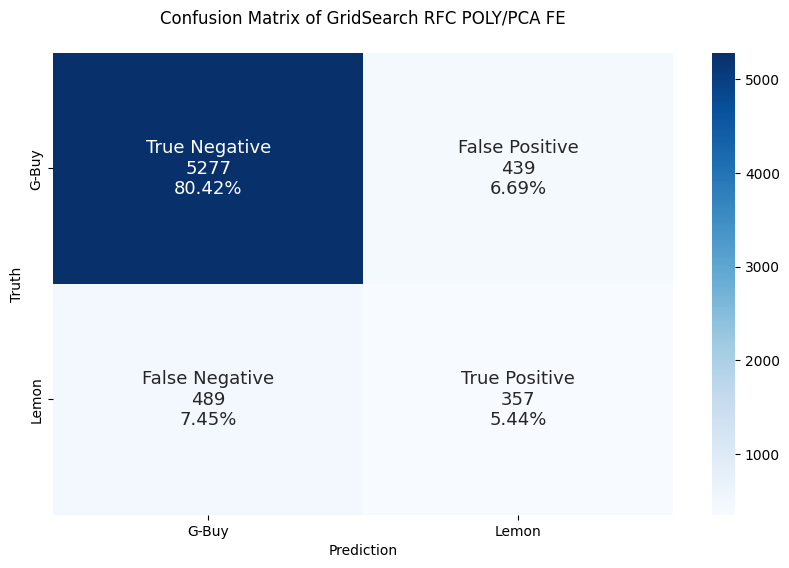

In [84]:
print('Scoring of GridSearch RFC FE')
display(grid_rfc_poly_pca_FE_metrics.style.hide())
Confusion_Matrix_Func(y_test, pred_rfc_poly_pca_FE_grid, 'GridSearch RFC POLY/PCA FE');

#### Save as pickle

In [76]:
directory_path = r"D:\Visual Studio Code\Used Cars Sales\Pickle"
filename       = "Optimised_GridSearch_RFC_PCA_POLY_FE.p"

# Save to the specified directory
pickle.dump(optimised_rfc_poly_pca_FE_grid, open(directory_path + "\\" + filename, "wb"))

### The GridSearch Optimised RF model

In [77]:
# Final model

poly_pca_pipe             = Pipeline([('poly'  , PolynomialFeatures(degree=2)),
                                      ('scaler', StandardScaler()),
                                      ('pca'   , PCA(n_components=.99))
                                    ])

preprocessor              = ColumnTransformer([
                                              ('num', poly_pca_pipe, num_cols),
                                              ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_FE)
                                              ])

rfc                       = RandomForestClassifier(class_weight      = 'balanced',
                                                   random_state      = 442, 
                                                   n_estimators      = 86,
                                                   max_depth         = 36,
                                                   min_samples_leaf  = 2,    
                                                   min_samples_split = 11
                                                 )

pipeline_rfc_poly_pca_FE     = Pipeline([('preprocessor', preprocessor),
                                         ('rfClassifier', rfc)
                                       ])

#### Fit & Smile

In [78]:
pipeline_rfc_poly_pca_FE.fit(X_train_copy, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.99))]),
                                                  ['MMRAcquisitionAuctionAveragePrice',
                                                   'MMRAcquisitionAuctionCleanPrice',
                                                   'MMRAcquisitionRetailAveragePrice',
                                                   'MMRAcquisitonRetailCleanPrice',
                                                   'MMRCurrentAuctionAveragePrice',
                                                   'M...
                                                   'Transmission',
                                                   'Nationality', 'Size',
                                                   'TopThreeAmericanName',
                                                   'IsOnlineSale', 'PRIMEUNIT',
                                                   'AUCGUART', 'BYRNO',
                                                   'VNZIP1', 'VNST',
                                                   'PurchDate_year',
                                                   'PurchDate_month',
                                                   'PurchDate_dayofweek',
                                                   'TransactionCluster'])])),
                ('rfClassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=36,
                                        min_samples_leaf=2,
                                        min_samples_split=11, n_estimators=86,
                                        random_state=442))])

#### Scores & Confusion matrix

Scoring of GridSearch RFC FE


Model,F1 Score,Recall,Precision,Accuracy
Optimised RFC with POLY/PCA FE,0.434836,0.421986,0.448492,0.858580


-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


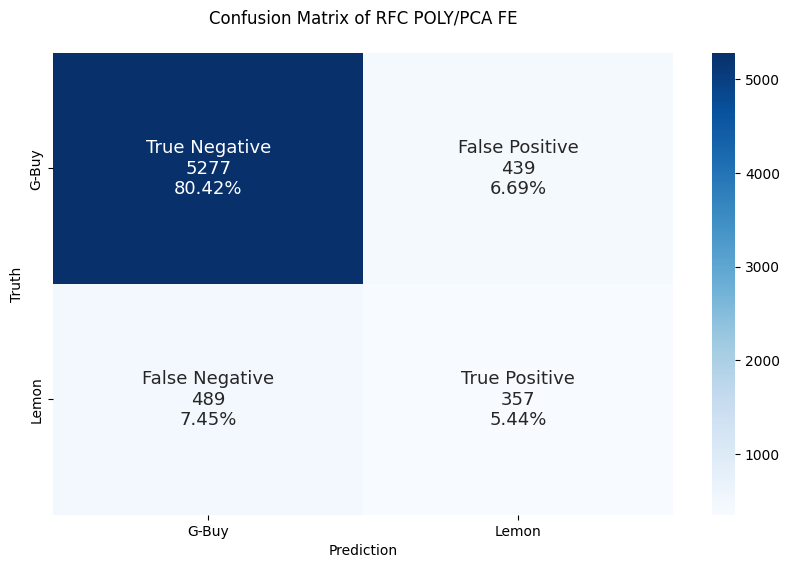

In [69]:

pred_rfc_poly_pca_FE        = pipeline_rfc_poly_pca_FE.predict(X_test_copy) 

f1_rfc_poly_pca_FE          = f1_score(y_test       , pred_rfc_poly_pca_FE)
recall_rfc_poly_pca_FE      = recall_score(y_test   , pred_rfc_poly_pca_FE)
precision_rfc_poly_pca_FE   = precision_score(y_test, pred_rfc_poly_pca_FE)
accuracy_rfc_poly_pca_FE    = accuracy_score(y_test , pred_rfc_poly_pca_FE)



rfc_poly_pca_FE_metrics     = pd.DataFrame({
                                            'Model'    : ['Optimised RFC with POLY/PCA FE'],
                                            'F1 Score' : [f1_rfc_poly_pca_FE],
                                            'Recall'   : [recall_rfc_poly_pca_FE],
                                            'Precision': [precision_rfc_poly_pca_FE],
                                            'Accuracy' : [accuracy_rfc_poly_pca_FE]
                                            })

print('Scoring of GridSearch RFC FE')
display(rfc_poly_pca_FE_metrics.style.hide())
print('-- '*30)
Confusion_Matrix_Func(y_test, pred_rfc_poly_pca_FE, 'RFC POLY/PCA FE');